In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
# Generate synthetic sine wave time series data
def generate_sine_data(seq_length=50, total_points=1000):
    x = np.linspace(0, 100, total_points)
    y = np.sin(x)
    X, Y = [], []
    for i in range(len(y) - seq_length):
        X.append(y[i:i+seq_length])
        Y.append(y[i+seq_length])
    return np.array(X), np.array(Y)

# Prepare the dataset
SEQ_LEN = 50
X, y = generate_sine_data(SEQ_LEN)
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)

# Predict
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


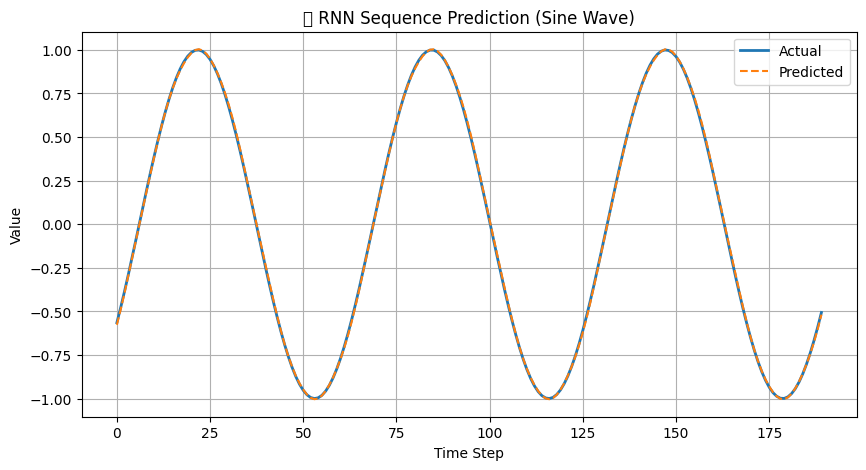

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label='Actual', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', linestyle='--')
plt.title('📈 RNN Sequence Prediction (Sine Wave)')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()